In [1]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [2]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }



In [3]:

tics = []
tcm = 'Spectral'


In [4]:

tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan

In [5]:
def test_region_parsing():
    w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
    cbar = plt.colorbar(w, ticks=tics)
    t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
    plt.suptitle('ocean regions, subdivided')

    fact = 0.2
    fig = plt.figure(figsize=(30*fact,15*fact))
    import matplotlib
    cmap = matplotlib.cm.get_cmap('Spectral')
    norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
    for i in range(0,len(regs)):
        rgba = cmap(norm(regdict[regs[i]]['number']))
        plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
        regdict[regs[i]]['colour'] = rgba
    plt.legend(ncol = 5, fontsize = 10)
    plt.suptitle('colours assigned')

In [6]:
# test_region_parsing()

In [7]:
# maskno_broad = np.zeros([31,149,182])
# # tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')

# for i in range(0,31):
#     maskno_broad[i,:,:] = maskno

In [8]:
import glob

def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

baseDir = '/gpfs/data/greenocean/software/runs/'
tr = 'TOM12_TJ_GEA0'
yrst = 2015
yrend = 2020
dtype = 'ptrc'
tylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)
tdat_GEA0 = xr.open_mfdataset(tylist)
tdat_GEA0

<xarray.Dataset>
Dimensions:               (y: 149, x: 182, deptht: 31, time_counter: 72,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 2015-01-16 12:00:00 ... 2020-...
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/34)
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    Alkalini              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    O2                    (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DIC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ...                    ...
    BSi                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GON                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    C11                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    B14B                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    C14B                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    D14B                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
Attributes:
    name:         ORCA2_1m_20150101_20151231
    description:  planktom sms variables
    title:        planktom sms variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2023-Jun-20 15:12:18 BST

In [9]:
DIC = tdat_GEA0.DIC.isel(deptht=0)
TA = tdat_GEA0.Alkalini.isel(deptht=0)

In [10]:
mean_masks = np.zeros([len(regs), 149, 182])
for i, reg in enumerate(regs):
    mean_masks[i][maskno == regdict[reg]['number']] = 1

In [16]:
DIC_mean = np.zeros([len(regs), len(DIC), ])
TA_mean = np.zeros([len(regs), len(TA), ])
DIC_total_mean = np.zeros([len(regs)])
TA_total_mean = np.zeros([len(regs),])

for j in range(len(regs)):
    mask_data_array = xr.DataArray(mean_masks[j], dims=['y', 'x'])
    DIC_total_mean[j] = DIC.weighted(mask_data_array).mean(dim = ['x','y', 'time_counter'])
    TA_total_mean[j] = TA.weighted(mask_data_array).mean(dim = ['x','y', 'time_counter'])
    # for time_i in range(len(DIC)):
    #     DIC_mean[j][time_i] = DIC[time_i].weighted(mask_data_array).mean(dim = ['x','y'])
    #     TA_mean[j][time_i] = TA[time_i].weighted(mask_data_array).mean(dim=['x', 'y'])

In [12]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)

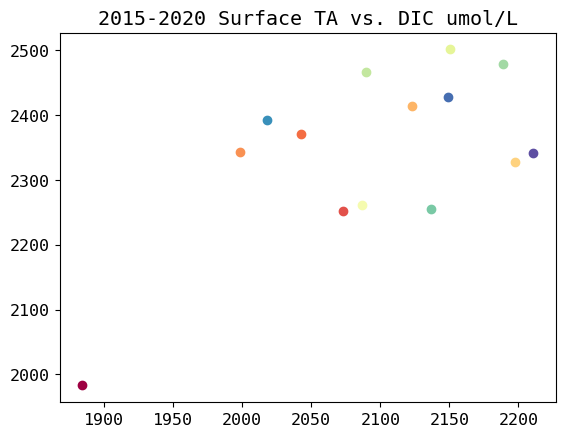

In [17]:

for j, reg in enumerate(regs):
    plt.scatter(DIC_total_mean[j] * 1e6, TA_total_mean[j] * 1e6, label = f'{reg}', color=cmap(norm(regdict[reg]['number'])))

plt.title(f'{yrst}-{yrend} Surface TA vs. DIC umol/L')
plt.show()


In [14]:
# plt.plot(DIC_ts_GEA0*1e6, TA_ts_GEA0*1e6, label = 'TOM12_DW_WE43')
# plt.legend()
# plt.title(f'{yrst}-{yrend} Surface TA vs. DIC umol/L')